# LFPBuzFeatures4

In [1]:
from scipy.io import loadmat
lfp_buz_features = loadmat('synthesised-features/lfp_buz_features.mat')

In [2]:
lfp_buz_features.keys()

dict_keys(['__header__', '__version__', '__globals__', 'lfpFeatures'])

In [3]:
lfp_buz_features['lfpFeatures'];

In [4]:
import pandas as pd
import numpy as np

lfp_matrix = np.array(lfp_buz_features['lfpFeatures'])

numColumns = len(lfp_matrix[0])

delta_pfc_df = pd.DataFrame(lfp_matrix[:, 0], columns=["DeltaPFC"])
theta_hpc_df = pd.DataFrame(lfp_matrix[:, 1], columns=["ThetaHPC"])
emg_like_df = pd.DataFrame(lfp_matrix[:, 4], columns=["EMGLike"])

timesteps = 10820

In [5]:
delta_pfc_df['Timestep'] = range(1, timesteps + 1)
delta_pfc_df.set_index('Timestep', inplace=True)

theta_hpc_df['Timestep'] = range(1, timesteps + 1)
theta_hpc_df.set_index('Timestep', inplace=True)

emg_like_df['Timestep'] = range(1, timesteps + 1)
emg_like_df.set_index('Timestep', inplace=True)

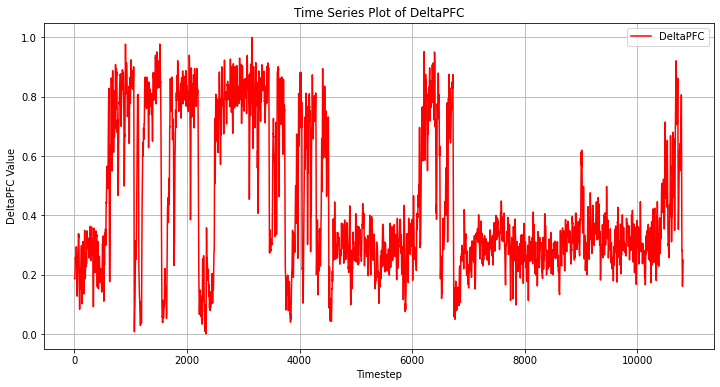

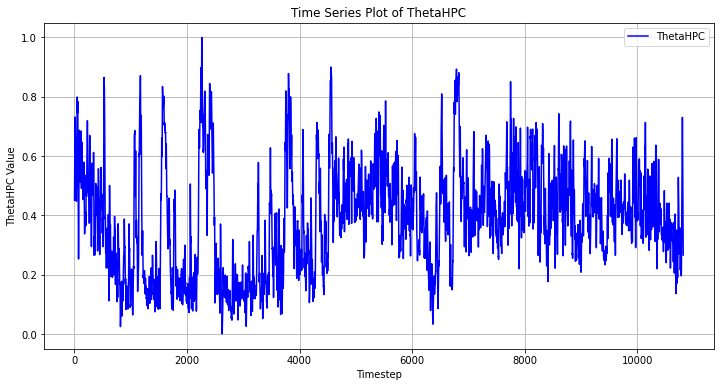

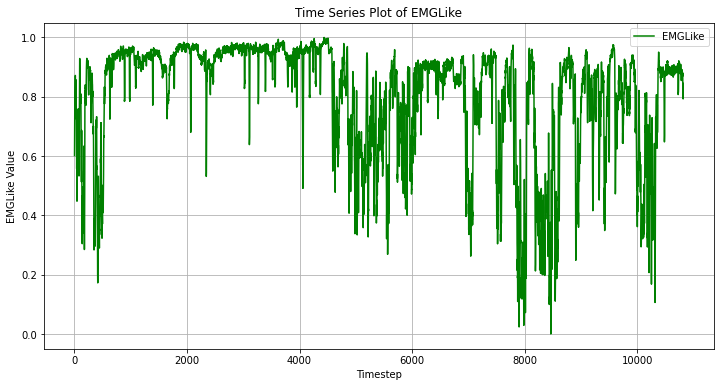

In [6]:
import matplotlib.pyplot as plt

plt.figure(figsize=(12, 6))
plt.plot(delta_pfc_df.index, delta_pfc_df['DeltaPFC'], label='DeltaPFC', color='red')
plt.title('Time Series Plot of DeltaPFC')
plt.xlabel('Timestep')
plt.ylabel('DeltaPFC Value')
plt.legend()
plt.grid(True)
plt.show()

plt.figure(figsize=(12, 6))
plt.plot(theta_hpc_df.index, theta_hpc_df['ThetaHPC'], label='ThetaHPC', color='blue')
plt.title('Time Series Plot of ThetaHPC')
plt.xlabel('Timestep')
plt.ylabel('ThetaHPC Value')
plt.legend()
plt.grid(True)
plt.show()

plt.figure(figsize=(12, 6))
plt.plot(emg_like_df.index, emg_like_df['EMGLike'], label='EMGLike', color='green')
plt.title('Time Series Plot of EMGLike')
plt.xlabel('Timestep')
plt.ylabel('EMGLike Value')
plt.legend()
plt.grid(True)
plt.show()

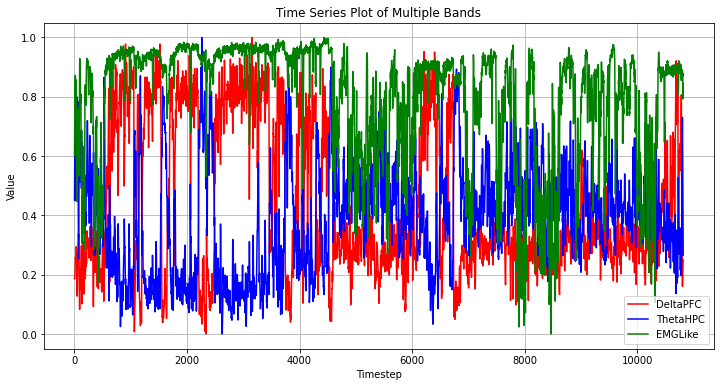

In [7]:
plt.figure(figsize=(12, 6))

plt.plot(delta_pfc_df.index, delta_pfc_df['DeltaPFC'], label='DeltaPFC', color='red')

plt.plot(theta_hpc_df.index, theta_hpc_df['ThetaHPC'], label='ThetaHPC', color='blue')

plt.plot(emg_like_df.index, emg_like_df['EMGLike'], label='EMGLike', color='green')

plt.title('Time Series Plot of Multiple Bands')
plt.xlabel('Timestep')
plt.ylabel('Value')
plt.legend()

plt.grid(True)
plt.show()

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


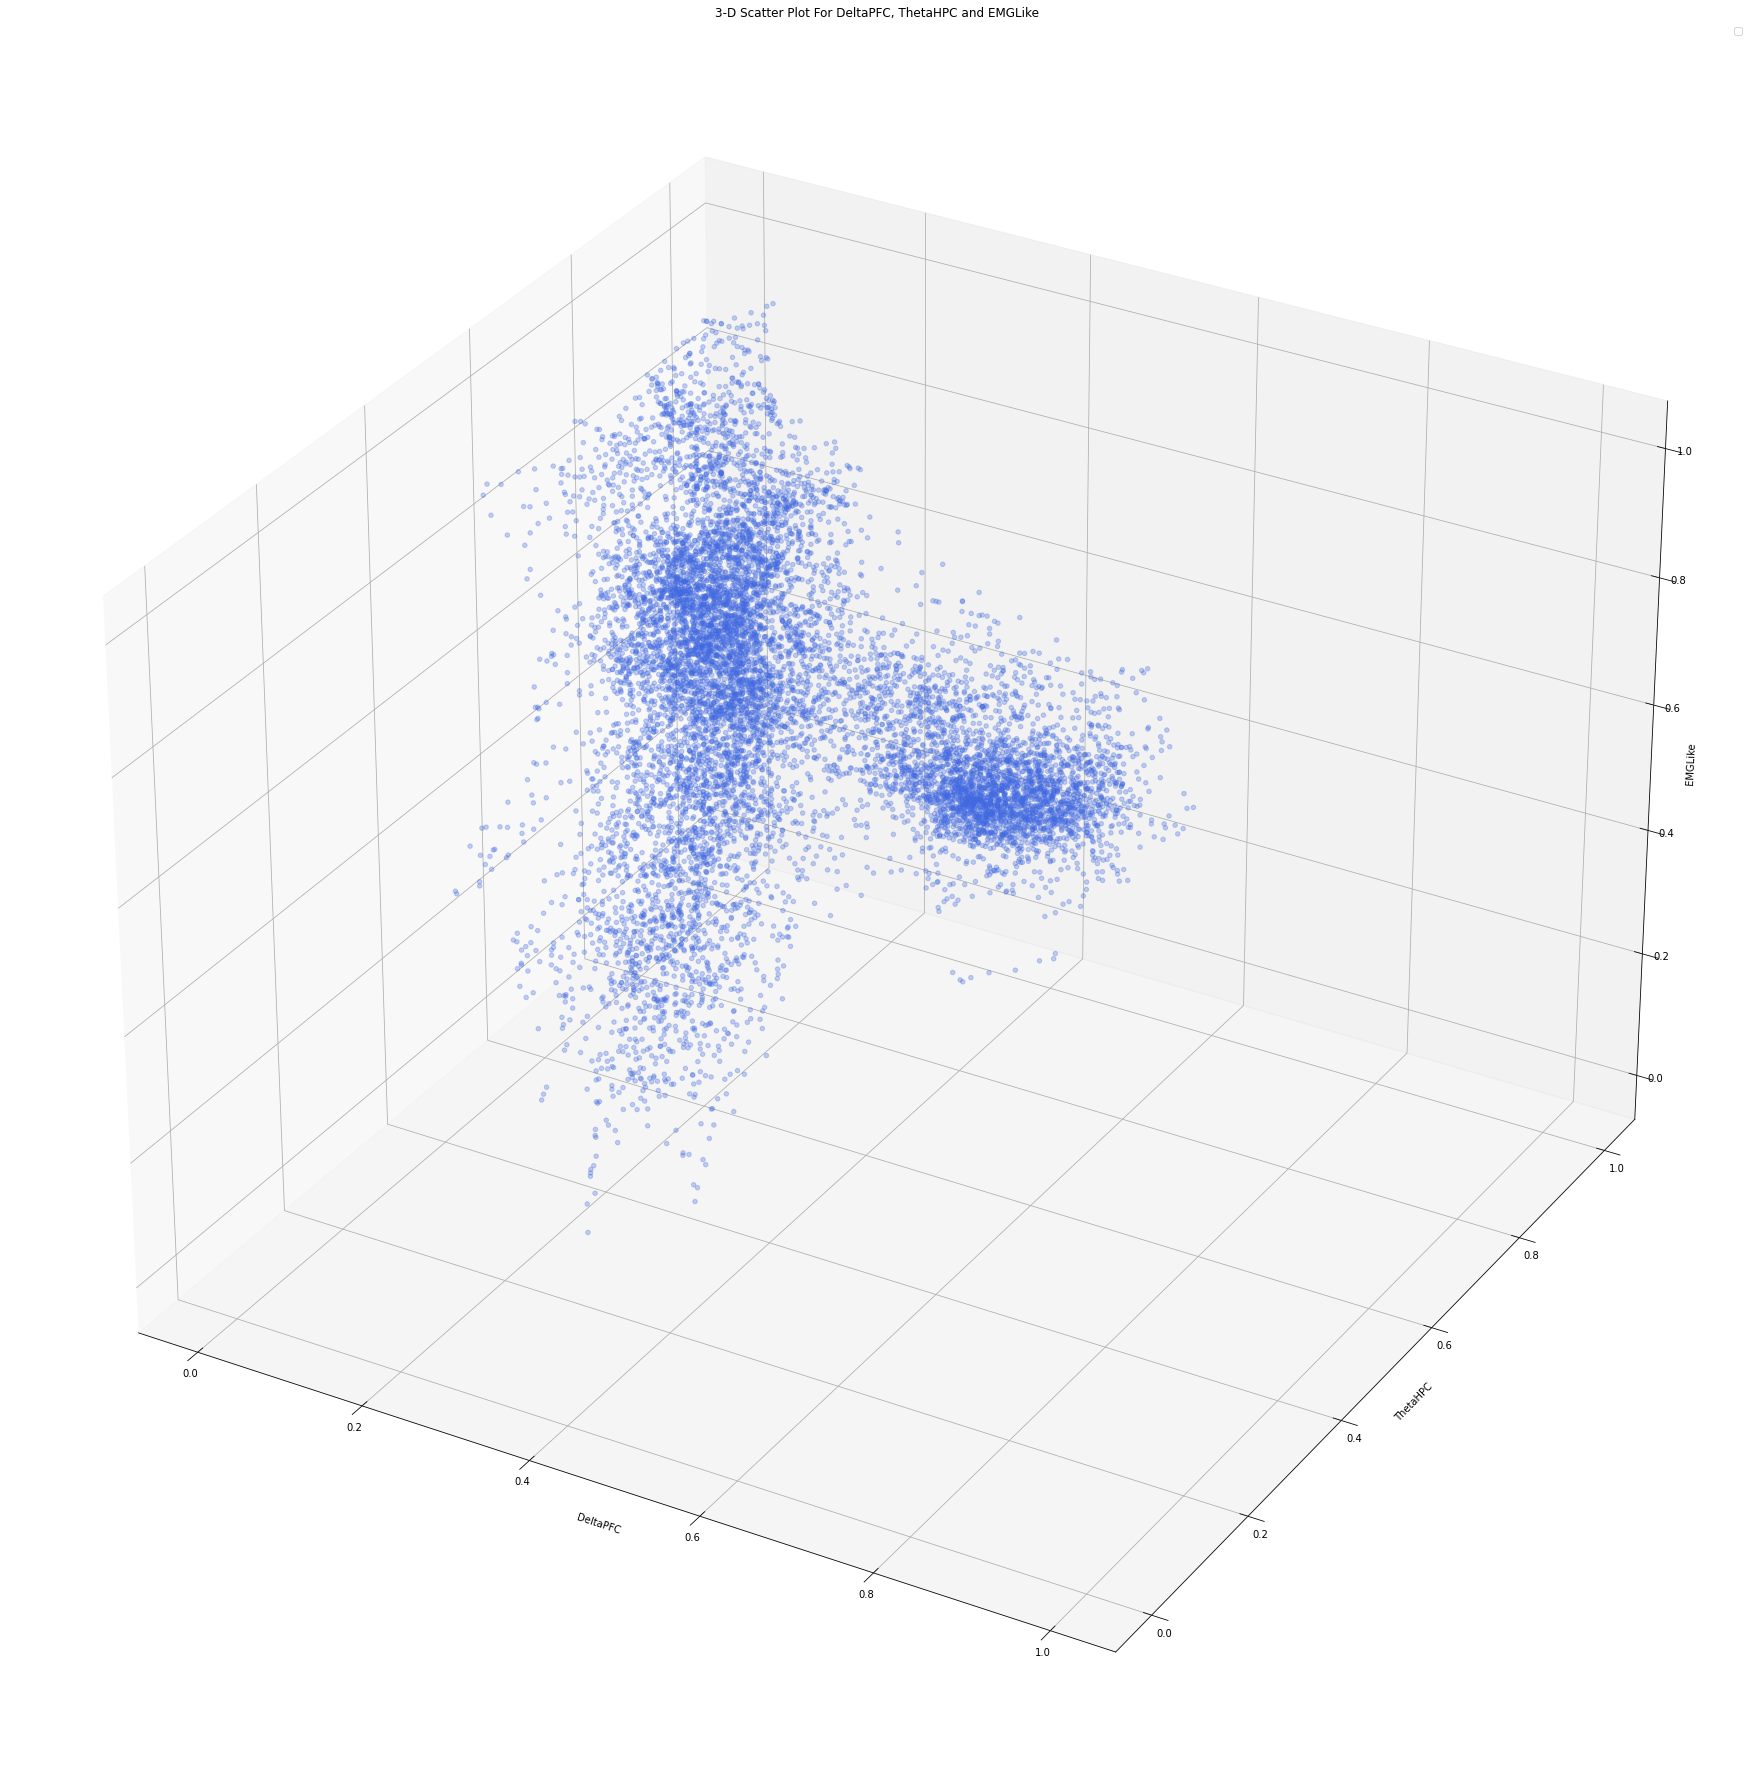

In [8]:
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
import numpy as np

# Generate example data with a categorical variable (replace this with your actual data)
data = {
    'deltaPFC': delta_pfc_df.to_numpy().flatten(),
    'thetaHPC': theta_hpc_df.to_numpy().flatten(),
    'emgLike': emg_like_df.to_numpy().flatten()
}

# Create a DataFrame from the data
df = pd.DataFrame(data)

# Create a 3D scatter plot using Seaborn
fig = plt.figure(figsize=(32, 32))
ax = fig.add_subplot(111, projection='3d')


ax.scatter(data['deltaPFC'], data['thetaHPC'], data['emgLike'], c='royalblue', alpha=0.3)

ax.set_xlabel('DeltaPFC')
ax.set_ylabel('ThetaHPC')
ax.set_zlabel('EMGLike')
ax.set_title('3-D Scatter Plot For DeltaPFC, ThetaHPC and EMGLike')
ax.legend()

plt.savefig('feature-plots/delta-theta-emg.png', dpi=300, bbox_inches='tight')

plt.show()

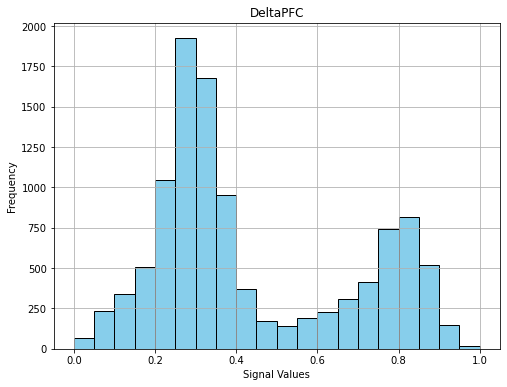

In [9]:
plt.figure(figsize=(8, 6))
plt.hist(delta_pfc_df['DeltaPFC'], bins=20, color='skyblue', edgecolor='black')
plt.xlabel('Signal Values')
plt.ylabel('Frequency')
plt.title('DeltaPFC')
plt.grid(True)
plt.show()

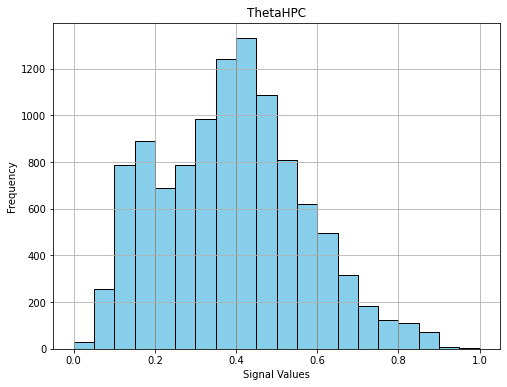

In [10]:
plt.figure(figsize=(8, 6))
plt.hist(theta_hpc_df['ThetaHPC'], bins=20, color='skyblue', edgecolor='black')
plt.xlabel('Signal Values')
plt.ylabel('Frequency')
plt.title('ThetaHPC')
plt.grid(True)
plt.show()

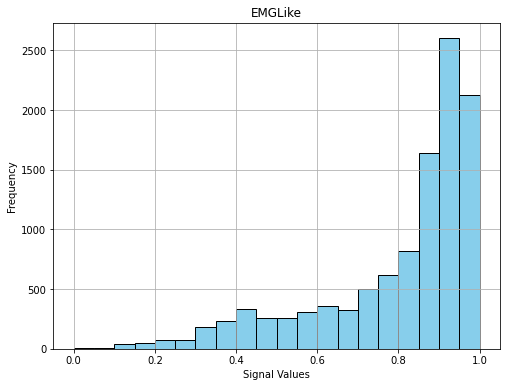

In [11]:
plt.figure(figsize=(8, 6))
plt.hist(emg_like_df['EMGLike']
, bins=20, color='skyblue', edgecolor='black')
plt.xlabel('Signal Values')
plt.ylabel('Frequency')
plt.title('EMGLike')
plt.grid(True)
plt.show()